In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import StandardScaler
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv("Dataset/customer_segmentation.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Id: Unique identifier for each individual in the dataset.
Year_Birth: The birth year of the individual.
Education: The highest level of education attained by the individual.
Marital_Status: The marital status of the individual.
Income: The annual income of the individual.
Kidhome: The number of young children in the household.
Teenhome: The number of teenagers in the household.
Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.
Recency: The number of days since the last purchase or interaction.
MntWines: The amount spent on wines.
MntFruits: The amount spent on fruits.
MntMeatProducts: The amount spent on meat products.
MntFishProducts: The amount spent on fish products.
MntSweetProducts: The amount spent on sweet products.
MntGoldProds: The amount spent on gold products.
NumDealsPurchases: The number of purchases made with a discount or as part of a deal.
NumWebPurchases: The number of purchases made through the company's website.
NumCatalogPurchases: The number of purchases made through catalogs.
NumStorePurchases: The number of purchases made in physical stores.
NumWebVisitsMonth: The number of visits to the company's website in a month.
AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.
AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.
AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.
AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.
AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.
Complain: Binary indicator (1 or 0) whether the individual has made a complaint.
Z_CostContact: A constant cost associated with contacting a customer.
Z_Revenue: A constant revenue associated with a successful campaign response.
Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.

In [86]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [87]:
#Eliminar valores nulos
#df = df.dropna()

In [88]:
#Ver la frecuencia de la categoria de Marital_Status
educa_frecuencia = df['Marital_Status'].value_counts()
educa_frecuencia

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [89]:
# Reemplazar Together a Married
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

#Reemplazar similaridades a Single
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Absurd','Alone', 'Divorced','Widow' ],'Single')

#Segmenting education levels in three groups
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

#Convertir años a edad
df['Age'] = 2024-df['Year_Birth']

#Cantidad total de hijos en casa
df['Children']=df['Kidhome']+df['Teenhome']

# Convertir valores categoricos a numericos
#df['Marital_Status'] = df['Marital_Status'].map({"Married":1,"Single":0})

#Convertir valores de Dt_Customer a datetime acorde al formato
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

hoy = pd.Timestamp(datetime.now())

# Convertir valores en representacion de años como socio
df['Customer_For'] = hoy.year - df['Dt_Customer'].dt.year

#Eliminar caracteristicas innecesarias o redundantes
to_drop = ['ID', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(to_drop, axis=1)
                                        

In [90]:
#Renombrar nombre de las caracteristicas
df= df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Resultado final
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_For
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,67,0,12
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,70,2,10
2,Graduate,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,59,0,11
3,Graduate,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,40,1,10
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,43,1,10


In [91]:
df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_For
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,0.950446,10.971875
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,0.684554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,10.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,11.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,11.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,11.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,3.000000,12.000000


In [92]:
educa_frecuencia = df['Education'].value_counts()
educa_frecuencia

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [93]:
#le = LabelEncoder()

#df['Education'] = le.fit_transform(df['Education'])

In [94]:
df['Income'] = df['Income'].fillna(0)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   Wines                2240 non-null   int64  
 5   Fruits               2240 non-null   int64  
 6   Meat                 2240 non-null   int64  
 7   Fish                 2240 non-null   int64  
 8   Sweets               2240 non-null   int64  
 9   Gold                 2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

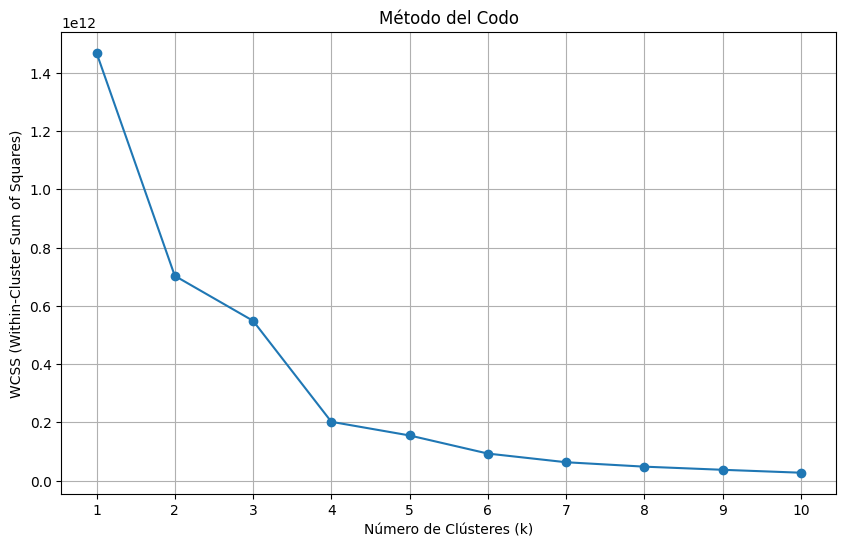

In [96]:
X = df.select_dtypes(include=[np.number]).values  # Solo columnas numéricas

# 3. Definir el rango de k
wcss = []  # lista para almacenar la inercia
k_range = range(1, 11)  # probar valores de k de 1 a 10

# 4. Ejecutar K-means para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # almacenar la inercia

# 5. Graficar la inercia
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid()
plt.show()

In [97]:
#plt.figure(figsize=(10, 6))
#plt.scatter(df['x'], df['y'], color='blue', alpha=0.5)
#plt.title('Gráfico de Dispersión')
#plt.xlabel('Eje X')
#plt.ylabel('Eje Y')
#plt.grid()
#plt.show()

In [98]:
clustering = KMeans(n_clusters = 4, max_iter = 300)
clustering.fit(X)

KMeans(n_clusters=4)

In [99]:
df['KMEans_Clusters'] = clustering.labels_
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Customer_For,KMEans_Clusters
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,67,0,12,3
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,70,2,10,3
2,Graduate,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,59,0,11,1
3,Graduate,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,40,1,10,0
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,43,1,10,3


In [100]:
pca = PCA(n_components=2)
pca_customer = pca.fit_transform(X)
pca_customer_df = pd.DataFrame(data = pca_customer, columns = ['Componente_1', 'Componente_2'])
pca_nombres_customer = pd.concat([pca_customer_df, df[['KMEans_Clusters']]], axis=1)

pca_nombres_customer

,Componente_1,Componente_2,KMEans_Clusters
0,6454.880147,398.947680,3
1,-5346.327536,-287.930871,3
2,19925.505676,-73.354241,1
3,-25043.429178,-107.598328,0
4,6604.037940,-198.252308,3
...,...,...,...
2235,9538.464787,312.155796,3
2236,12326.018861,-68.697776,3
2237,5298.087320,531.946333,3
2238,17558.031103,-20.550595,1


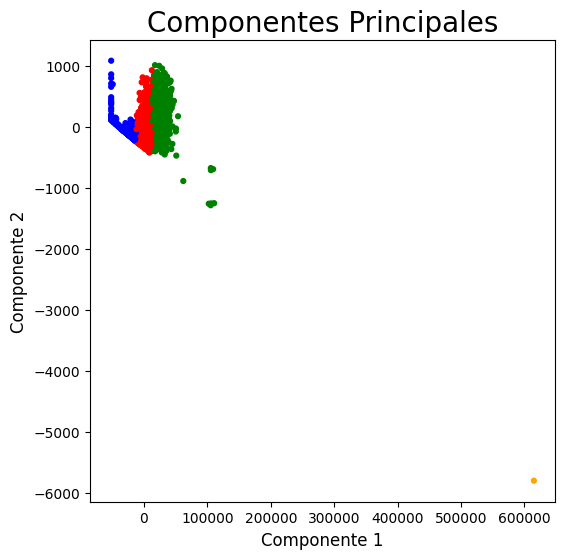

In [113]:
fig = plt.figure(figsize=(6, 6))

ax =fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 12)
ax.set_ylabel('Componente 2', fontsize = 12)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange", "red"])
ax.scatter(x = pca_nombres_customer.Componente_1, y = pca_nombres_customer.Componente_2,
            c=color_theme[pca_nombres_customer.KMEans_Clusters],s =12)

plt.show()

In [83]:
print(pca_nombres_customer.KMEans_Clusters.unique())

[ 1.  3.  0. nan  2.]
